In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
with open('./../shared_data_read_only/Data/DHS/GH_2022_DHS/GHKR8BSD/GHKR8BFL.SAS', 'r') as file:
    dataStr = file.read().replace('\n', '')

In [3]:
pattern = r'attrib (\w+)[^;]*label="([^"]+)"'

# Extract attrib and label pairs
matches = re.findall(pattern, dataStr)


270


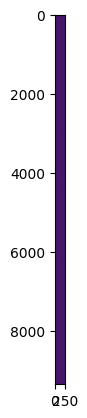

268
False
[[ 73  75]
 [244  74]
 [184  73]
 [ 73  55]
 [244  71]
 [244  70]
 [ 73  65]
 [ 73  64]
 [ 73  63]
 [ 73  62]
 [ 73  61]
 [ 73  60]
 [ 24 151]
 [ 73  59]
 [ 24 157]
 [ 24 158]
 [ 73  58]
 [ 73  57]
 [ 73  56]
 [195  71]]
Pair: AWFACTE - V155 | Correlation: nan
Pair: B4 - AWFACTW | Correlation: nan
Pair: V472O - AWFACTE | Correlation: nan
Pair: AWFACTE - V129 | Correlation: nan
Pair: B4 - AWFACTU | Correlation: nan
Pair: B4 - AWFACTT | Correlation: nan
Pair: AWFACTE - V149 | Correlation: nan
Pair: AWFACTE - V140 | Correlation: nan
Pair: AWFACTE - V139 | Correlation: nan
Pair: AWFACTE - V138 | Correlation: nan
Pair: AWFACTE - V137 | Correlation: nan
Pair: AWFACTE - V136 | Correlation: nan
Pair: V022 - V463C | Correlation: nan
Pair: AWFACTE - V135 | Correlation: nan
Pair: V022 - V463I | Correlation: nan
Pair: V022 - V463X | Correlation: nan
Pair: AWFACTE - V133 | Correlation: nan
Pair: AWFACTE - V131 | Correlation: nan
Pair: AWFACTE - V130 | Correlation: nan
Pair: V481D - AWFACT

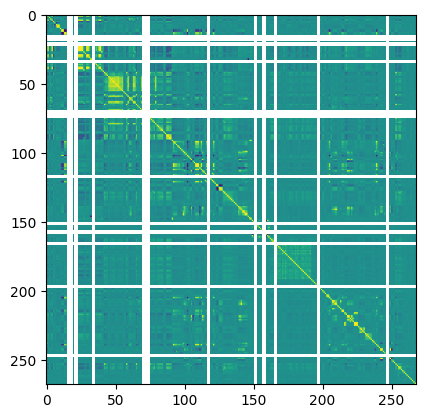

In [4]:
# Load data (this is unchanged from your code)
df = pd.read_sas('./../shared_data_read_only/Data/DHS/GH_2022_DHS/GHKR8BSD/GHKR8BFL.SAS7BDAT')

# Get the clean data codes and labels
cleanDataCodes = []
cleanDataLabels = []
for match in matches:
    nanNum = df[match[0]].isna().sum()
    if nanNum == 0:
        cleanDataCodes.append(match[0])
        cleanDataLabels.append(match[1])

# Convert to numpy arrays for efficiency (optional but not necessary here)
cleanDataCodes = np.array(cleanDataCodes)
cleanDataLabels = np.array(cleanDataLabels)

# Select only numeric columns
print(len(df[cleanDataCodes].columns.values))
df_numeric = df[cleanDataCodes].select_dtypes(include=['number'])
plt.imshow(df_numeric)
plt.show()
df_numeric_codes = df_numeric.columns.values
print(len(df_numeric.columns.values))
print(np.isnan(df_numeric.to_numpy()).any())

# Compute the correlation matrix
cov_matrix = np.array(df_numeric.corr())
# print(df_numeric.corr())
plt.imshow(cov_matrix)
# plt.show()
# print(np.array(df_numeric.corr()))
# print(np.isnan(cov_matrix).any())

# Set diagonal elements to zero to avoid self-correlation
np.fill_diagonal(cov_matrix, 0)
# print(cov_matrix.flatten())
# print(np.isnan(cov_matrix.flatten()).any())

# Flatten the matrix and get the absolute values
abs_cov_flat = np.abs(cov_matrix.flatten())

# Get the indices of the top 20 correlations
# c = np.isnan(abs_cov_flat).sum()
# print(c)
largest_indices_flat = np.argpartition(abs_cov_flat, -20)[-20:]

# Convert the flat indices back to 2D indices
largest_indices_2d = np.unravel_index(largest_indices_flat, cov_matrix.shape)

# Stack the results for clearer interpretation
largest_indices_2d_combined = np.vstack(largest_indices_2d).T

# Output the indices of the highest correlations (variables)
print(largest_indices_2d_combined)

# If you want to know which variables they correspond to, you can print them as well:
for idx_pair in largest_indices_2d_combined:
    print(f"Pair: {df_numeric_codes[idx_pair[0]]} - {df_numeric_codes[idx_pair[1]]} | Correlation: {cov_matrix[idx_pair[0], idx_pair[1]]}")